In [13]:
pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ------------------------- ------------ 184.3/278.7 kB 5.6 MB/s eta 0:00:01
     -------------------------------------  276.5/278.7 kB 5.7 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=8148f3d8a7b689674746972db5b9cf7c986070cb959dbbe1289c5075e7cc66d5
  Stored in directory: c:\users\don_q\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pydotplus

In [16]:
pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
import graphviz


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import graphviz

In [33]:
std1 = pd.read_excel('C:/Users/don_q/Downloads/record.xlsx')



In [25]:
std.head(10)

,ID,Grades,ConsultationsD1,ConsultationsD2,Hrabsence,Finalgrades
0,4974728.2,90,13,12,21.0,Pass
1,4938705.2,67,7,6,22.0,Pass
2,4927889.2,70,28,14,12.0,Pass
3,4975219.6,60,7,16,16.0,Pass
4,4927465.4,55,16,5,38.0,Retake
5,4974585.2,65,8,6,8.0,Pass
6,4975289.8,64,10,9,20.0,Pass
7,4927634.4,79,7,8,20.0,Pass
8,4974853.0,70,6,6,20.0,Pass
9,4975224.8,63,12,13,14.0,Pass


In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
std['Finalgrades'] = label_encoder.fit_transform(std['Finalgrades'])
std['Finalgrades'].unique()

array([0, 2, 1])

In [30]:
std.head(10)

,ID,Grades,ConsultationsD1,ConsultationsD2,Hrabsence,Finalgrades
0,4974728.2,90,13,12,21.0,0
1,4938705.2,67,7,6,22.0,0
2,4927889.2,70,28,14,12.0,0
3,4975219.6,60,7,16,16.0,0
4,4927465.4,55,16,5,38.0,2
5,4974585.2,65,8,6,8.0,0
6,4975289.8,64,10,9,20.0,0
7,4927634.4,79,7,8,20.0,0
8,4974853.0,70,6,6,20.0,0
9,4975224.8,63,12,13,14.0,0


In [36]:
dummies = pd.get_dummies(std1['Finalgrades']).astype(int)
print(dummies)

    Pass  Redo  Retake
0      1     0       0
1      1     0       0
2      1     0       0
3      1     0       0
4      0     0       1
5      1     0       0
6      1     0       0
7      1     0       0
8      1     0       0
9      1     0       0
10     0     1       0
11     1     0       0
12     0     1       0
13     1     0       0
14     1     0       0
15     1     0       0
16     1     0       0
17     0     1       0
18     1     0       0
19     1     0       0
20     1     0       0
21     1     0       0
22     1     0       0
23     0     1       0
24     1     0       0
25     0     1       0
26     1     0       0
27     0     1       0
28     1     0       0
29     0     1       0
30     0     1       0
31     0     1       0
32     1     0       0
33     1     0       0


In [37]:
counts = dummies.sum()
print(counts)

Pass      24
Redo       9
Retake     1
dtype: int64


In [40]:
merged = pd.concat([std1, dummies], axis='columns')
#merged = merged.drop(['ID' , 'Name'], axis=1)
merged.head()

,ID,Grades,ConsultationsD1,ConsultationsD2,Hrabsence,Finalgrades,Pass,Redo,Retake
0,4974728.2,90,13,12,21.0,Pass,1,0,0
1,4938705.2,67,7,6,22.0,Pass,1,0,0
2,4927889.2,70,28,14,12.0,Pass,1,0,0
3,4975219.6,60,7,16,16.0,Pass,1,0,0
4,4927465.4,55,16,5,38.0,Retake,0,0,1


In [42]:
merged['Consultations'] = merged['ConsultationsD1'] + merged['ConsultationsD2']
merged.head()

,ID,Grades,ConsultationsD1,ConsultationsD2,Hrabsence,Finalgrades,Pass,Redo,Retake,Consultations
0,4974728.2,90,13,12,21.0,Pass,1,0,0,25
1,4938705.2,67,7,6,22.0,Pass,1,0,0,13
2,4927889.2,70,28,14,12.0,Pass,1,0,0,42
3,4975219.6,60,7,16,16.0,Pass,1,0,0,23
4,4927465.4,55,16,5,38.0,Retake,0,0,1,21


In [43]:
Pred_df=merged.drop(['ConsultationsD1', 'ConsultationsD2', 'Pass', 'Redo', 'Retake'], axis='columns')
Pred_df.head()

,ID,Grades,Hrabsence,Finalgrades,Consultations
0,4974728.2,90,21.0,Pass,25
1,4938705.2,67,22.0,Pass,13
2,4927889.2,70,12.0,Pass,42
3,4975219.6,60,16.0,Pass,23
4,4927465.4,55,38.0,Retake,21


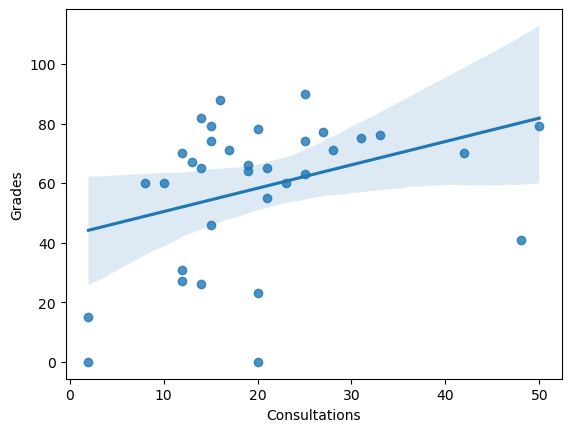

In [45]:
relation1=sns.regplot(x='Consultations' , y='Grades', data=Pred_df)

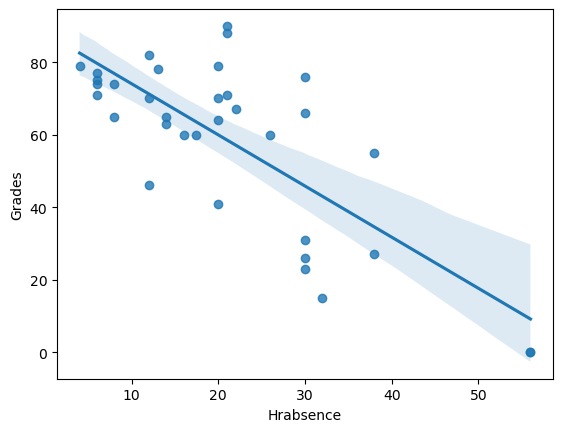

In [47]:
relation2=sns.regplot(x='Hrabsence', y='Grades', data=Pred_df)

In [ ]:
#PCA Analysis
## Extract the information

In [49]:
Comp = Pred_df[['Grades', 'Consultations', 'Hrabsence']]

In [ ]:
#Standarize the data 

In [50]:
scaler = StandardScaler()
Comp_std=scaler.fit_transform(Comp)

In [ ]:
#PCA application
## Create a PCA with the number of component to analyse

In [52]:
pca=PCA(n_components=3)

#Adjust the model to the data
pca.fit(Comp_std)

#Get the principle components and the varianse
components=pca.components_
explained_var_ratio=pca.explained_variance_ratio_


In [53]:
print(components)

[[-0.62605456 -0.45531207  0.63304551]
 [-0.34672788  0.88969955  0.29700925]
 [ 0.6984522   0.03355053  0.71486984]]


In [54]:
print(explained_var_ratio)

[0.67614491 0.24391212 0.07994297]


In [ ]:
#Transform the data in the space PCA

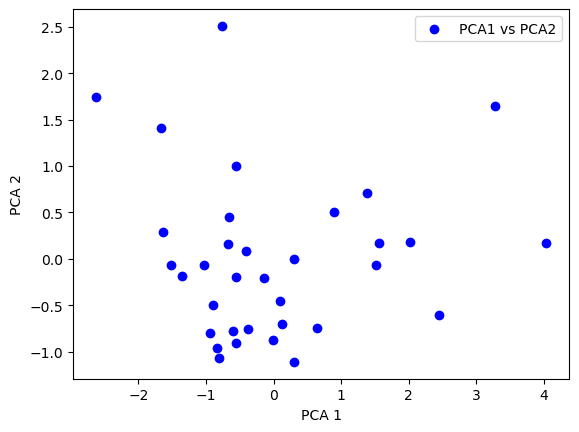

In [56]:
X_pca=pca.transform(Comp_std)

#Graphic
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', label='PCA1 vs PCA2')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

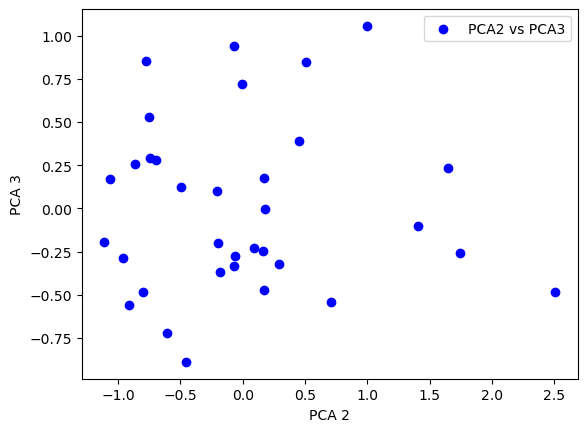

In [58]:
plt.scatter(X_pca[:, 1], X_pca[:, 2], c='b', label='PCA2 vs PCA3')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')
plt.legend()
plt.show()

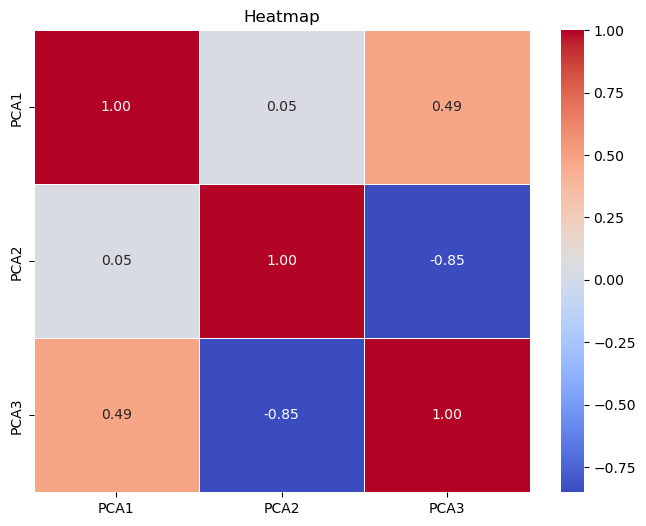

In [57]:
correlation_matrix = pd.DataFrame(components, columns=['PCA1', 'PCA2', 'PCA3']).corr()

# creat a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap')
plt.show()

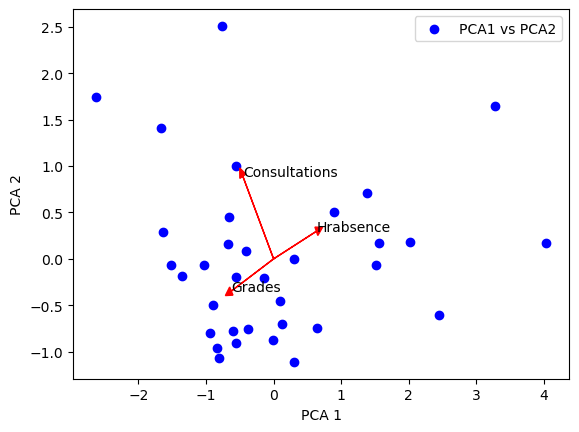

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Comp_std)

fig, ax = plt.subplots()

ax.scatter(X_pca[:, 0], X_pca[:, 1], c='b', label='PCA1 vs PCA2')

for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    ax.arrow(0, 0, pc1, pc2, head_width=0.1, head_length=0.1, fc='r', ec='r')
    ax.text(pc1, pc2, Comp.columns[i])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()